Summary Statistics:
                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min    

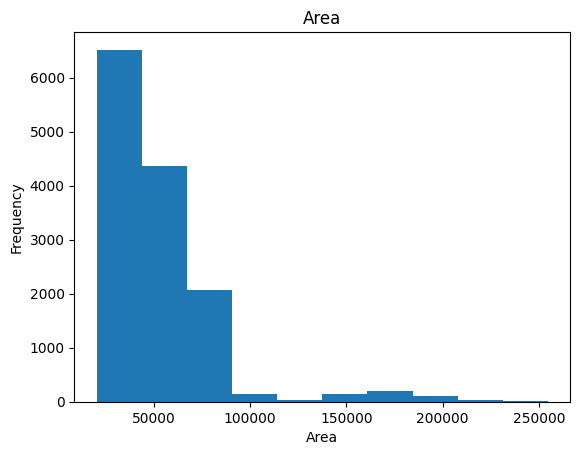

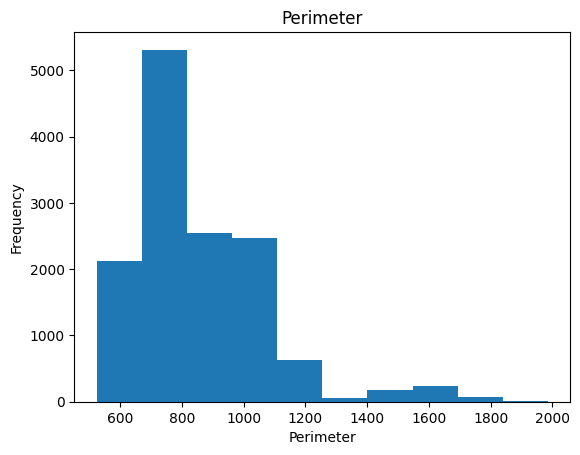

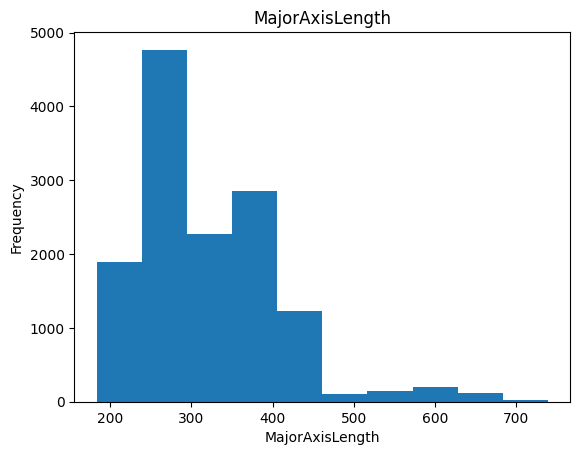

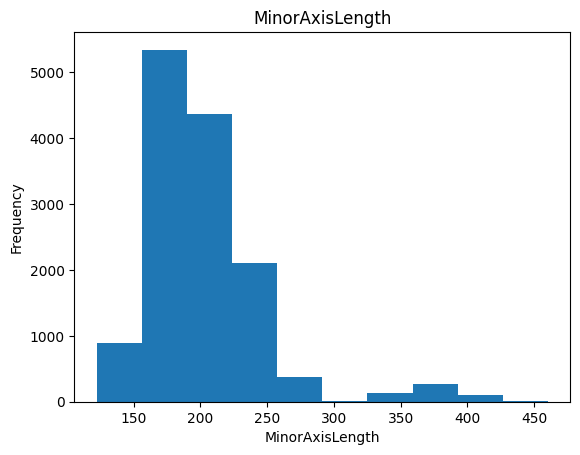

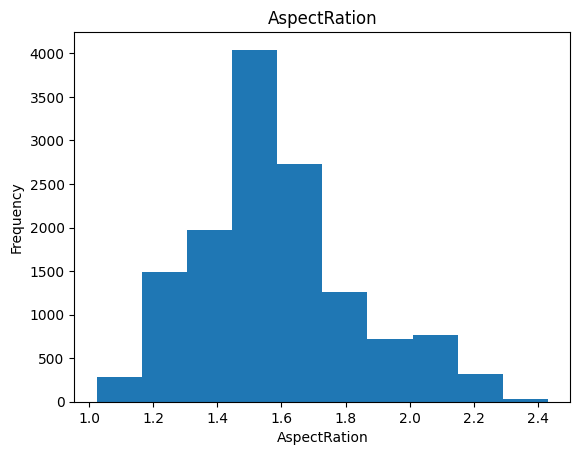

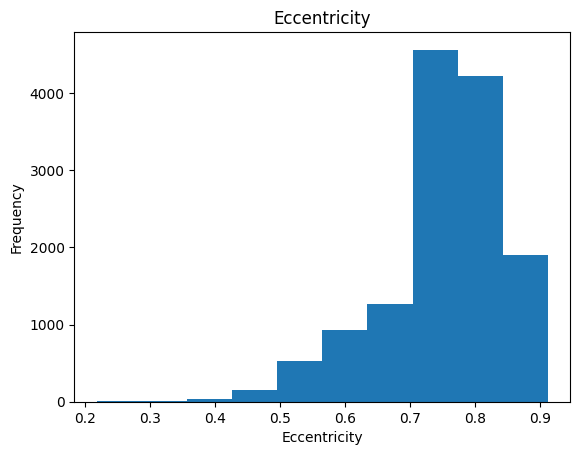

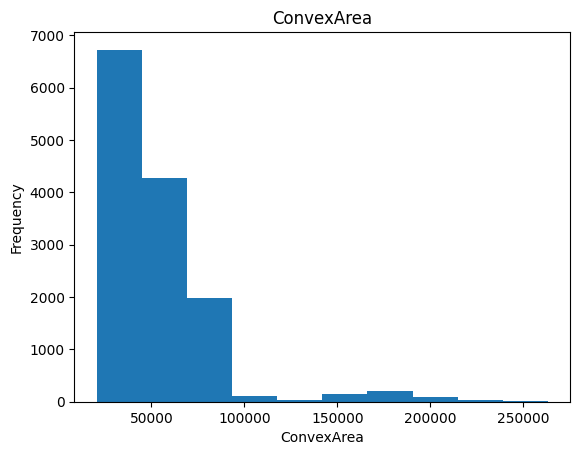

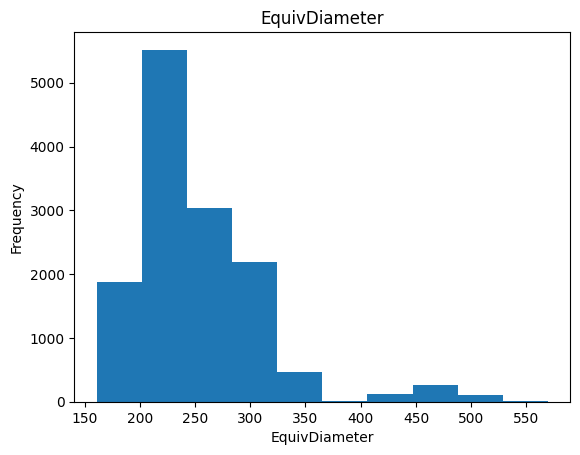

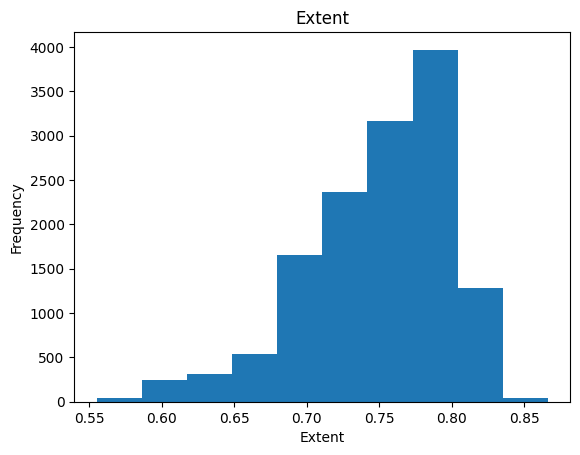

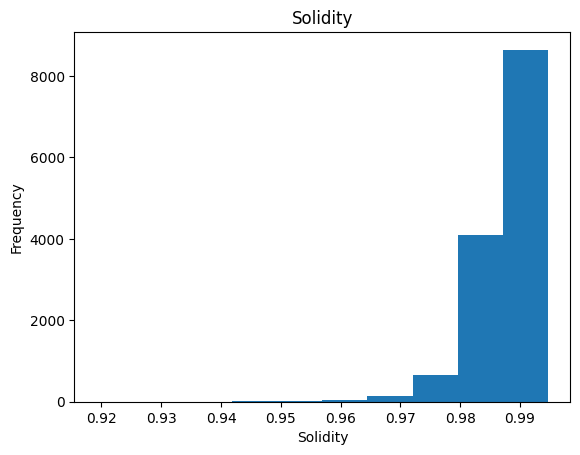

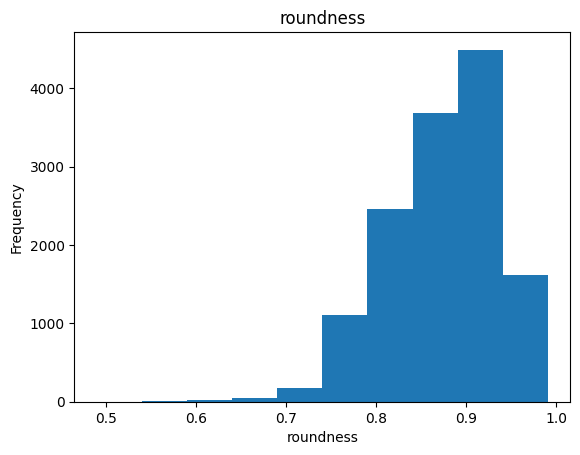

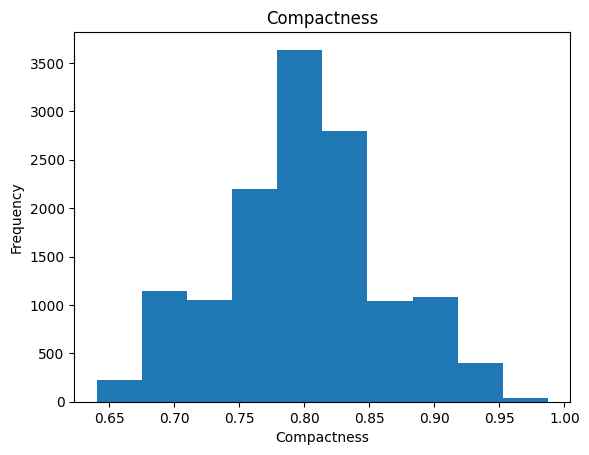

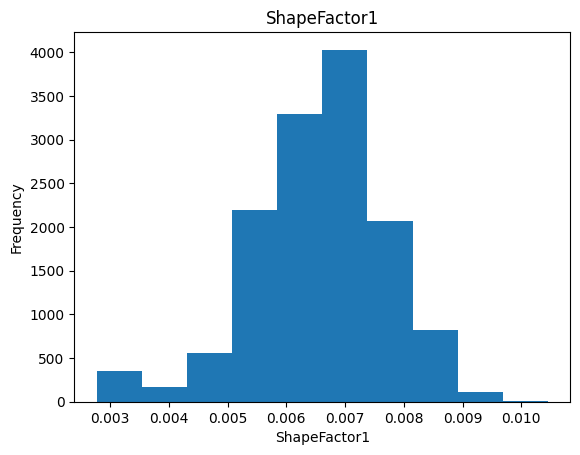

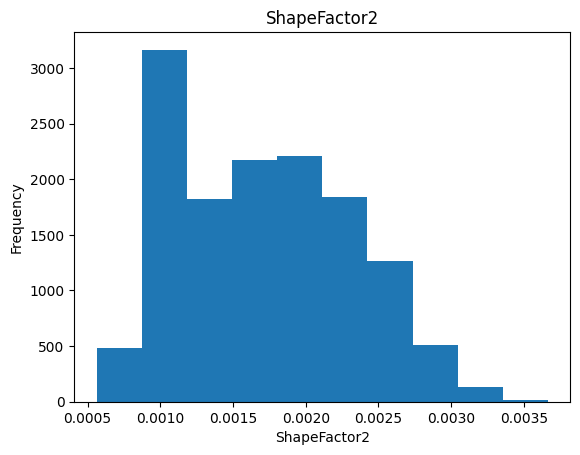

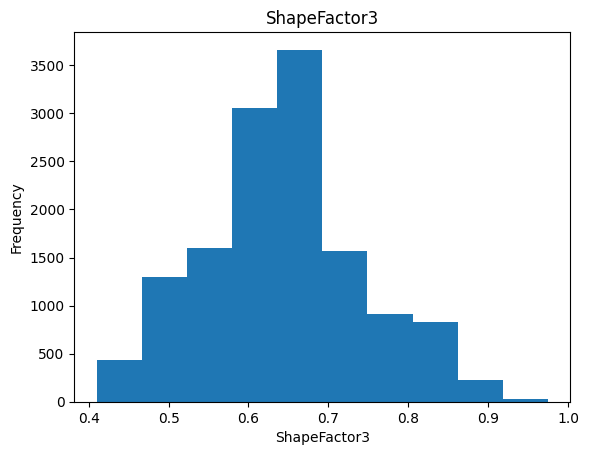

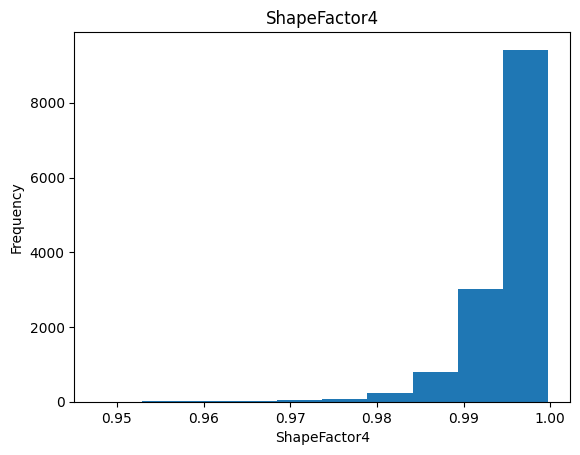

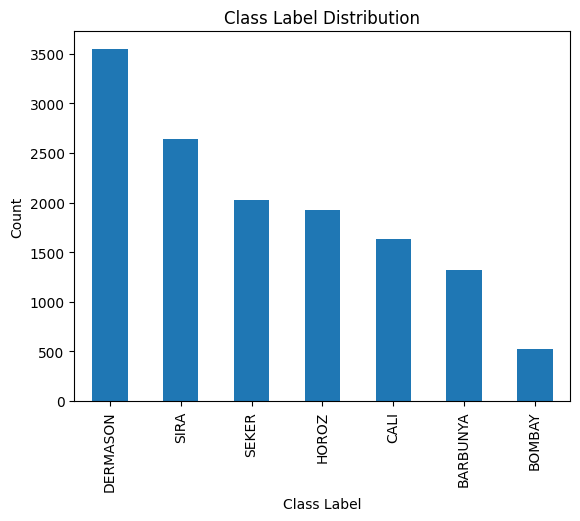

Encoding Categorical Values:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def load_data(file_path):
    """Load data from an Excel file."""
    try:
        data = pd.read_excel(file_path)
        return data
    except FileNotFoundError:
        print("File not found. Please provide a valid file path.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def analyze_data(data, roll_number):
    """Perform basic data analysis."""
    if data is not None:
        # Display summary statistics
        print("Summary Statistics:")
        print(data.describe())

        # Plot histograms for numeric columns
        print("Histograms:")
        for col in data.select_dtypes(include=['int', 'float']):
            data[col].plot(kind='hist', bins=10)
            plt.title(col)
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.show()
        
        # Plot bar plot for the class label (string type)
        class_label_counts = data['Class'].value_counts()
        class_label_counts.plot(kind='bar')
        plt.title('Class Label Distribution')
        plt.xlabel('Class Label')
        plt.ylabel('Count')
        plt.show()

        # Handle missing values if roll_number is even
        if roll_number % 2 == 0:
            print("Missing Values:")
            print(data.isnull().sum())

        # Encode categorical values if roll_number is odd
        if roll_number % 2 != 0:
            categorical_cols = data.select_dtypes(include=['object']).columns
            if len(categorical_cols) > 0:
                print("Encoding Categorical Values:")
                label_encoder = LabelEncoder()
                for col in categorical_cols:
                    data[col] = label_encoder.fit_transform(data[col])
            else:
                print("No categorical columns found in the data.")

def main():
    file_path = input("Enter the path to the Excel file: ") #r'D:\MTECH\DLOps\dlops_activity\DryBeanDataset\Dry_Bean_Dataset.xlsx'
    roll_number = int(input("Enter your roll number: ")) #m22aie241 , 241
    data = load_data(file_path)
    analyze_data(data, roll_number)

if __name__ == "__main__":
    main()
